<a href="https://colab.research.google.com/github/michaelchapa/ai_a1_coronaVirus_Texas_search/blob/master/CS3793_5233_assignment1_dvo473.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTSA CS 3793/5233: Assignment-1

Summer 2020


**Chapa - Michael - (dvo473)**






## Learning Objectives


*   Read data from a file and Create a graph
*   Implement Uninformed & Informed searching strategies
*   Apply different searching strategies for the given problem
*   Analyze and Compare the searching strategies



## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**. 
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, a vaccine was developed and brought to a port city of Texas. The vaccine should be distributed in the fastest way possible to the worst affect city of Texas. Find an **optimal** strategy to distribute the vaccine (Informed Search).

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


#Reading Data Files & Creating a 2D Graph

##(40 points)

In this section, you will write code to read the data files provided, cities.csv and distances.csv, and create a 2D graph consisting of nodes and edges. The goal is to use this graph for the 2 search agents that you will create in the next section.

Provided with this lab, on Blackboard, you will find 2 csv files:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains straight-line distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line denotes that there should be an edge between *San Antonio* and *New Braunfels* and the weight on that edge, i.e. the distance, is *30.80876734*.

In the code blocks below, handle the logic for the graph. Load the graph data from the give files and display a 2D graph of the given data, with labeled nodes and edges. Create as many functions or code blocks as needed.

##Extra Credit (4 points)

Overlay the 2D graph on an image of the Texas state map.





In [188]:
# Add only your imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [189]:
# Load data from Michael Chapa's github project
distances = pd.read_csv('https://raw.githubusercontent.com/michaelchapa/ai_a1_coronaVirus_Texas_search/master/distances.csv', names = ["city1", "city2", "distance"])
cities = pd.read_csv('https://raw.githubusercontent.com/michaelchapa/ai_a1_coronaVirus_Texas_search/master/cities.csv', names = ["city", "latitude", "longitude"])

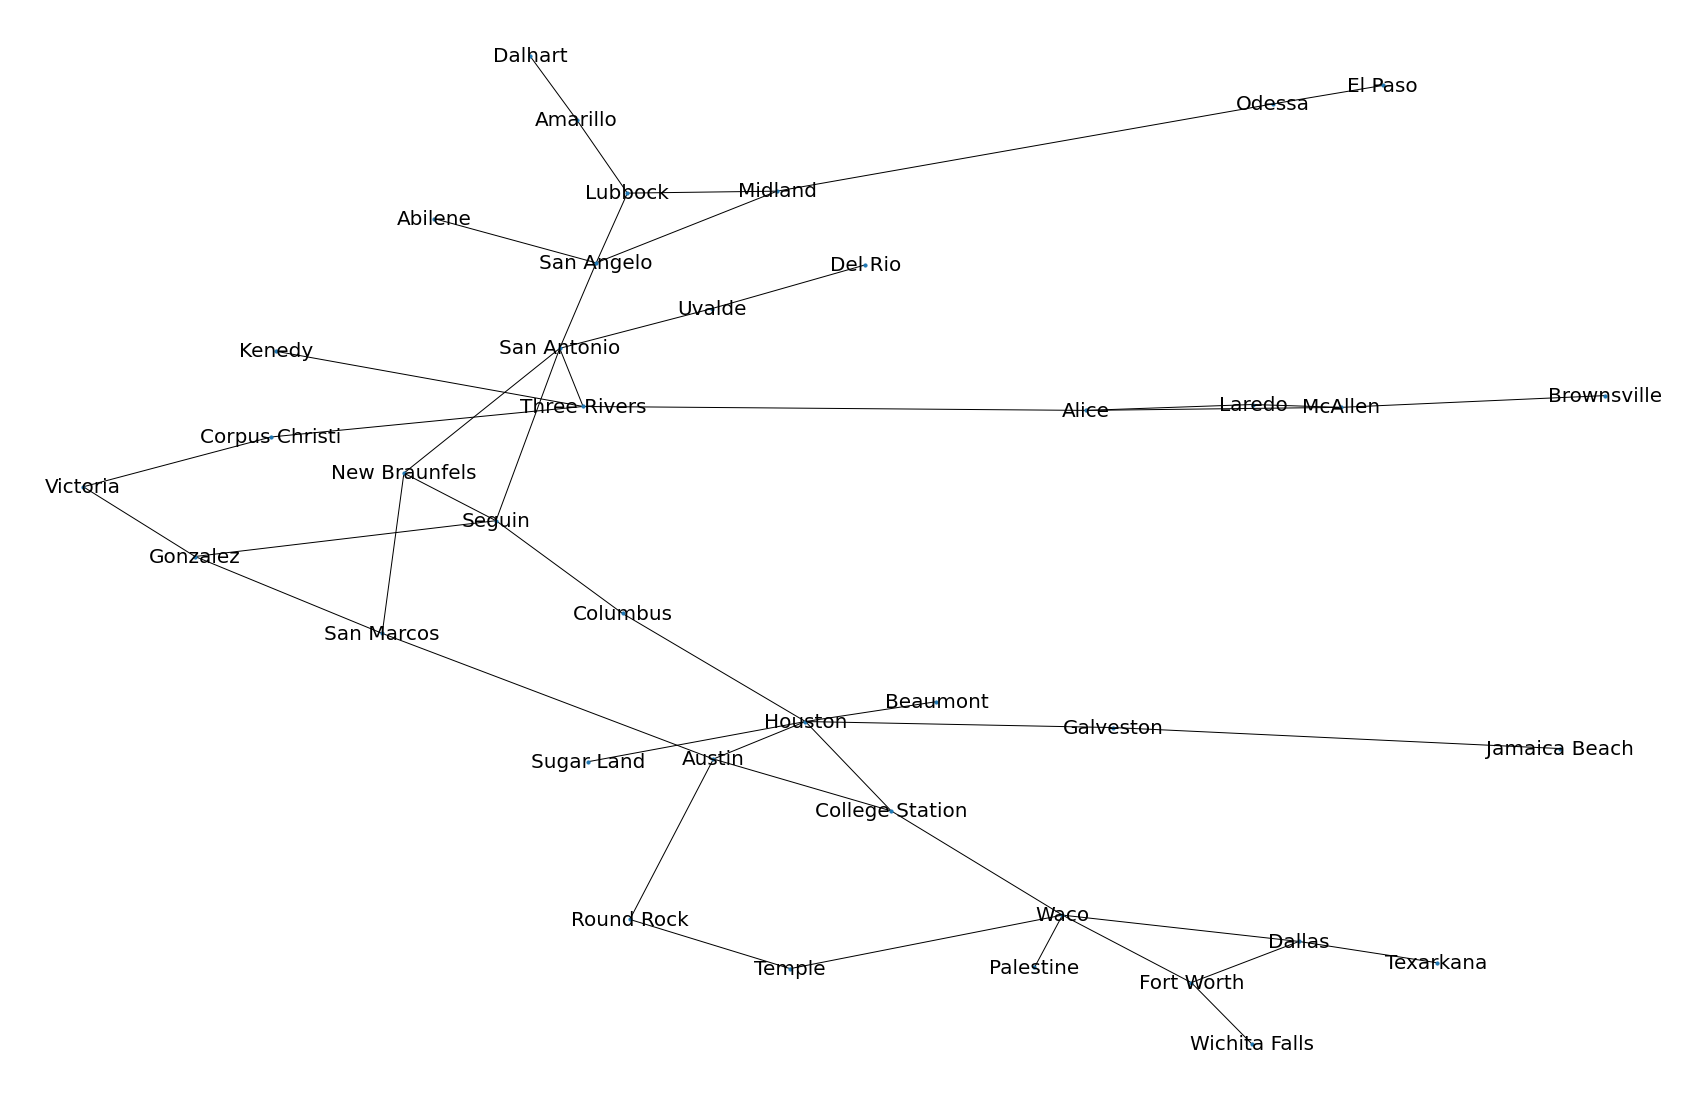

In [190]:
# Display a 2D graph of the given data.
coordinates = cities.iloc[:, 1:]

graph = nx.Graph()
for index, row in distances.iterrows():
  graph.add_edge(row[0], row[1], weight = row[2])

edges = [(u, v) for (u, v, d) in graph.edges(data = True)]

fig = plt.figure(figsize = (30, 20))
position = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, position, node_size = 10)
nx.draw_networkx_edges(graph, position, edgelist = edges)
nx.draw_networkx_labels(graph, position, font_size = 20, font_family = 'sans-serif')

plt.axis('off')
plt.show()

#Virus Spread - Uninformed Search Agent

##(40 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [191]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'
# Breadth First - Infect all nodes
frontier = [] # To be infected
frontier.append('Three Rivers')
explored = set() # Infected
distanceTravelled = 0

while(frontier):
  hostCity = frontier.pop()
  if hostCity not in explored:
    citiesToInfect = [n for n in graph.neighbors(hostCity)]
    for city in citiesToInfect:
      if city not in explored and city not in frontier:
        frontier.append(city) # Needs to be infected
        print(hostCity, "infected:", city + ".")
        distance = graph.get_edge_data(hostCity, city, default = 0)
        distanceTravelled += distance['weight']
  explored.add(hostCity) # infected!
print("\nDistance Travelled: %.2lf miles" % distanceTravelled)


Three Rivers infected: San Antonio.
Three Rivers infected: Corpus Christi.
Three Rivers infected: Alice.
Three Rivers infected: Kenedy.
Alice infected: Laredo.
Alice infected: McAllen.
McAllen infected: Brownsville.
Corpus Christi infected: Victoria.
Victoria infected: Gonzalez.
Gonzalez infected: Seguin.
Gonzalez infected: San Marcos.
San Marcos infected: Austin.
San Marcos infected: New Braunfels.
Austin infected: Round Rock.
Austin infected: College Station.
Austin infected: Houston.
Houston infected: Beaumont.
Houston infected: Galveston.
Houston infected: Columbus.
Houston infected: Sugar Land.
Galveston infected: Jamaica Beach.
College Station infected: Waco.
Waco infected: Temple.
Waco infected: Palestine.
Waco infected: Fort Worth.
Waco infected: Dallas.
Dallas infected: Texarkana.
Fort Worth infected: Wichita Falls.
San Antonio infected: San Angelo.
San Antonio infected: Uvalde.
Uvalde infected: Del Rio.
San Angelo infected: Midland.
San Angelo infected: Lubbock.
San Angelo in

#Vaccine Distribution - Informed Search Agent

##(40 points)

In this section, you will create an *informed search* agent that will be used to distribute the vaccine. The vaccine was developed outside US and brought to Texas at the port city of **Corpus Christi**. The goal is to create an **optimal strategy** to distribute the vaccine and make it available at the most affected city **Amarillo**.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print 

*   The path or sequence of cities that will be visited in the optimal vaccine distribution strategy.
*   The total distance travelled in the optimal vaccine distribution strategy.


##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [192]:
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'Corpus Chriti' to 'Amarillo'



#Submission Instructions



1.   Complete all tasks above.
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard



##Rubric

*   (40 points) Reading Data files & Creating a 2D Graph
*   (40 points) Virus Spread - Uninformed Search Agent
*   (40 points) Vaccine Distribution - Informed Search Agent
*   (10 points) Extra Credit - on the Texas map image, overlay the 2D graph and the paths selected by the search agents





Works Cited<br>
[Load CSV](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

[Plot on map](https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db)